In [15]:
pip install numpy pandas scikit-learn


In [16]:
pip install matplotlib

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/climate_change.csv')

# Display the first few rows
print(data.head())

   Year  Month    MEI     CO2      CH4      N2O   CFC-11   CFC-12        TSI  \
0  1983      5  2.556  345.96  1638.59  303.677  191.324  350.113  1366.1024   
1  1983      6  2.167  345.52  1633.71  303.746  192.057  351.848  1366.1208   
2  1983      7  1.741  344.15  1633.22  303.795  192.818  353.725  1366.2850   
3  1983      8  1.130  342.25  1631.35  303.839  193.602  355.633  1366.4202   
4  1983      9  0.428  340.17  1648.40  303.901  194.392  357.465  1366.2335   

   Aerosols   Temp  
0    0.0863  0.109  
1    0.0794  0.118  
2    0.0731  0.137  
3    0.0673  0.176  
4    0.0619  0.149  


In [ ]:

data.isna().sum()

,0
Year,0
Month,0
MEI,0
CO2,0
CH4,0
N2O,0
CFC-11,0
CFC-12,0
TSI,0
Aerosols,0


In [ ]:
data.shape

(308, 11)

In [ ]:
#splitting the  x(features) and y(target):
from sklearn.model_selection import train_test_split
X=data[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols','Year', 'Month']]
Y = data[['Temp']]
#Splitting the data into test and training set:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("Y_train",Y_train.shape)
print("Y_test",Y_test.shape)

X_train (246, 10)
X_test (62, 10)
Y_train (246, 1)
Y_test (62, 1)


In [ ]:
#Training part:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

#Evaluating part:
Y_pred = model.predict(X_test)
print(Y_pred)

[[ 0.43410989]
 [-0.00495396]
 [ 0.16218317]
 [ 0.13460296]
 [ 0.03036101]
 [ 0.01250716]
 [ 0.16376034]
 [ 0.27553363]
 [ 0.44448294]
 [ 0.16049482]
 [ 0.11699698]
 [ 0.21763125]
 [ 0.31998011]
 [ 0.34694863]
 [ 0.47858159]
 [ 0.40166935]
 [ 0.00376265]
 [ 0.21139584]
 [ 0.24181103]
 [ 0.34644871]
 [ 0.13436707]
 [ 0.08731834]
 [ 0.24822377]
 [ 0.38553884]
 [ 0.10807193]
 [ 0.42021577]
 [ 0.03968196]
 [ 0.02309824]
 [ 0.38600869]
 [ 0.45728593]
 [ 0.1435636 ]
 [ 0.08947709]
 [ 0.23667741]
 [ 0.45202949]
 [ 0.18341751]
 [ 0.02961778]
 [ 0.12175279]
 [ 0.01203108]
 [ 0.28199745]
 [ 0.2141094 ]
 [ 0.05857292]
 [-0.01306987]
 [ 0.50135483]
 [ 0.42519693]
 [ 0.36626568]
 [ 0.31205049]
 [ 0.45739852]
 [ 0.0078261 ]
 [ 0.42888667]
 [ 0.15889079]
 [ 0.06386955]
 [ 0.44849749]
 [ 0.25452771]
 [ 0.21808651]
 [ 0.40438254]
 [ 0.43600779]
 [ 0.40471896]
 [ 0.28805331]
 [ 0.32213685]
 [ 0.36644981]
 [ 0.49036366]
 [ 0.22666118]]


In [ ]:
# Calculate the Mean Squared Error (MSE) and R-squared (R^2) value
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.00941572216887505
R-squared: 0.7083677744990772


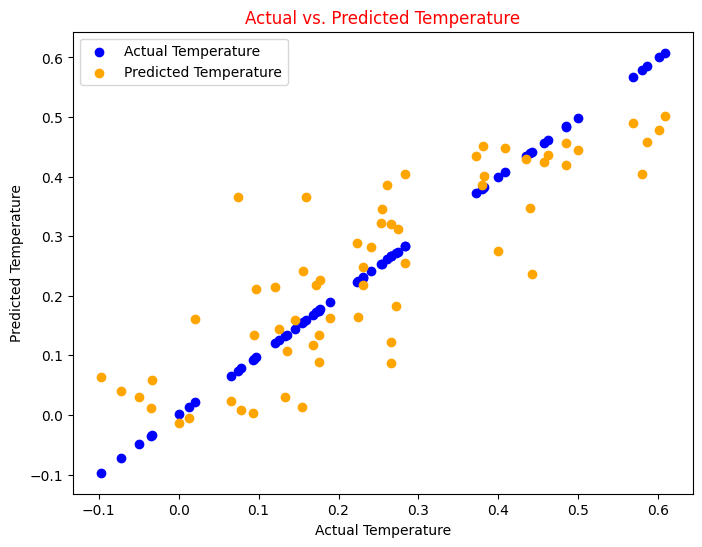

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_test, color='blue', label='Actual Temperature')  # Actual values in blue
plt.scatter(Y_test, Y_pred, color='orange', label='Predicted Temperature')  # Predicted values in orange
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs. Predicted Temperature', color='red')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Residuals')

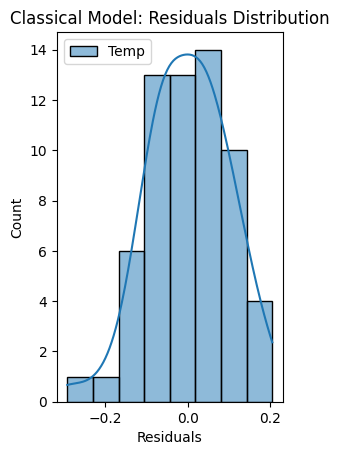

In [ ]:
residuals_classical = Y_test - Y_pred
plt.subplot(1, 2, 2)
sns.histplot(residuals_classical, kde=True, color='blue')
plt.title('Classical Model: Residuals Distribution')
plt.xlabel('Residuals')
